http://pandas.pydata.org/pandas-docs/stable/10min.html

# Pandas em 10 minutos

Essa é uma introdução curta ao Pandas, gera

Esta é uma breve introdução aos pandas, voltada principalmente para novos usuários. Você pode ver instruções mais complexas no [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

##Importação

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Criação de objetos


Criar uma série passando uma lista de valores, permitindo que o pandas crie um índice inteiro padrão:

In [5]:
s = pd.Series([1,3,5,np.nan,6,8])

In [6]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Criação de um DataFrame passando uma matriz numpy com um índice datetime e colunas rotuladas:

In [117]:
dates = pd.date_range('20210101', periods=6)

In [118]:
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [119]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list(['A','B','C','D']))
df

,A,B,C,D
2021-01-01,-0.598577,-1.063771,-1.723723,0.296374
2021-01-02,1.198821,-0.314914,0.578421,0.424447
2021-01-03,0.296986,-0.428069,-0.354873,-0.980979
2021-01-04,-0.652587,0.047158,0.899762,-0.516429
2021-01-05,-0.664959,1.299729,-1.157107,2.442601
2021-01-06,0.034204,1.716749,1.044658,-0.928242


Criando um DataFrame passando um dicionário de objetos que podem ser convertidos para séries.

In [121]:
df2 = pd.DataFrame({'C1':1.,
                   'C2':pd.Timestamp('20210102'),
                   'C3':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'C4':np.array([3]*4,dtype='int32'),
                   'C5':pd.Categorical(["test","train","test","train"]),
                   'C6':'foo'})

df2

,C1,C2,C3,C4,C5,C6
0,1.0,2021-01-02,1.0,3,test,foo
1,1.0,2021-01-02,1.0,3,train,foo
2,1.0,2021-01-02,1.0,3,test,foo
3,1.0,2021-01-02,1.0,3,train,foo


Conheça outros dtypes [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)

In [122]:
df2.dtypes

C1           float64
C2    datetime64[ns]
C3           float32
C4             int32
C5          category
C6            object
dtype: object

Se você estiver usando IPython, o preenchimento de tabulação para nomes de colunas (bem como atributos públicos) é habilitado automaticamente. Teste abaixo:

In [123]:
# df2.<TAB> ou Ctrl + ESPAÇO no colab.
df2
df2['C1'] 

0    1.0
1    1.0
2    1.0
3    1.0
Name: C1, dtype: float64

### Para mais detalhes sobre as estruturas de dados fornecidas pelo Pandas [ clique aqui](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

## Visualizando dados


See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2021-01-01,-1.169418,-2.196616,0.691433,1.283347
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038


In [14]:
df.tail(3)

,A,B,C,D
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038
2021-01-06,0.279982,1.808269,2.031055,0.120183


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns = ['A', 'B', 'C', 'D']
df

,A,B,C,D
2021-01-01,-1.169418,-2.196616,0.691433,1.283347
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038
2021-01-06,0.279982,1.808269,2.031055,0.120183


In [17]:
df.values

array([[-1.16941807, -2.19661565,  0.69143255,  1.28334721],
       [-0.05716675, -0.7923506 ,  0.12047334,  0.1635719 ],
       [ 0.98656946, -0.31372055,  0.15747062, -0.9143895 ],
       [ 1.308345  , -1.07547467, -0.17410286, -0.06765554],
       [-1.13456223,  0.59080775, -0.497223  , -0.25703796],
       [ 0.27998209,  1.8082691 ,  2.03105545,  0.12018335]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.035625,-0.329847,0.388184,0.054670
std,1.040567,1.390978,0.896214,0.717914
min,-1.169418,-2.196616,-0.497223,-0.914390
25%,-0.865213,-1.004694,-0.100459,-0.209692
50%,0.111408,-0.553036,0.138972,0.026264
75%,0.809923,0.364676,0.557942,0.152725
max,1.308345,1.808269,2.031055,1.283347


Transposing your data

In [19]:
df.T

,2021-01-01 00:00:00,2021-01-02 00:00:00,2021-01-03 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00
A,-1.169418,-0.057167,0.986569,1.308345,-1.134562,0.279982
B,-2.196616,-0.792351,-0.313721,-1.075475,0.590808,1.808269
C,0.691433,0.120473,0.157471,-0.174103,-0.497223,2.031055
D,1.283347,0.163572,-0.914390,-0.067656,-0.257038,0.120183


Sorting by value

In [20]:
df.sort_values(by=['B','C'])

,A,B,C,D
2021-01-01,-1.169418,-2.196616,0.691433,1.283347
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038
2021-01-06,0.279982,1.808269,2.031055,0.120183


### Conheça mais funções acessando na seção de [noções básicas do Pandas](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics).

## Selection

Observação: embora as expressões Python / Numpy padrão para seleção e configuração sejam intuitivas e úteis para trabalho interativo, para código de produção, os métodos de acesso de dados otimizados do pandas, .at, .iat, .loc, .iloc e .ix são mais recomendados.

Veja as seções de indexação do pandas [Indexando e Selecionando Dados](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) e [Indexação Avançada](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Obtendo dados

Selecionar uma única coluna, o que resulta em uma série, equivalente a df.A

In [21]:
df['A']

2021-01-01   -1.169418
2021-01-02   -0.057167
2021-01-03    0.986569
2021-01-04    1.308345
2021-01-05   -1.134562
2021-01-06    0.279982
Freq: D, Name: A, dtype: float64

Selecionando via [].

In [22]:
df[0:3]

,A,B,C,D
2021-01-01,-1.169418,-2.196616,0.691433,1.283347
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390


In [23]:
df['20210102':'20210104']

,A,B,C,D
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656


### Seleção por rótulo


Selecionando pelo índice da linha

In [24]:
dates[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [124]:
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [127]:
df.loc[dates[0]]

A   -0.598577
B   -1.063771
C   -1.723723
D    0.296374
Name: 2021-01-01 00:00:00, dtype: float64

Selecionando pelo rótulo da coluna

In [26]:
df.loc[:,['A','B']]


,A,B
2021-01-01,-1.169418,-2.196616
2021-01-02,-0.057167,-0.792351
2021-01-03,0.986569,-0.313721
2021-01-04,1.308345,-1.075475
2021-01-05,-1.134562,0.590808
2021-01-06,0.279982,1.808269


In [27]:
df.loc['20210102':'20210104',['A','B']]


,A,B
2021-01-02,-0.057167,-0.792351
2021-01-03,0.986569,-0.313721
2021-01-04,1.308345,-1.075475


Reduzindo as dimensões de uma instância

In [28]:
df.loc['20210102',['A','B']]

A   -0.057167
B   -0.792351
Name: 2021-01-02 00:00:00, dtype: float64

Selecionando uma célula

In [29]:
df.loc[dates[0],'A']

-1.1694180674685029

### Seleção por posição

In [30]:
df.iloc[3]

A    1.308345
B   -1.075475
C   -0.174103
D   -0.067656
Name: 2021-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5,0:2]

,A,B
2021-01-04,1.308345,-1.075475
2021-01-05,-1.134562,0.590808


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,-0.057167,0.120473
2021-01-03,0.986569,0.157471
2021-01-05,-1.134562,-0.497223


In [33]:
df.iloc[1:3,:]

,A,B,C,D
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390


In [34]:
df.iloc[:,1:3]

,B,C
2021-01-01,-2.196616,0.691433
2021-01-02,-0.792351,0.120473
2021-01-03,-0.313721,0.157471
2021-01-04,-1.075475,-0.174103
2021-01-05,0.590808,-0.497223
2021-01-06,1.808269,2.031055


In [35]:
df.iloc[1,1]

-0.7923505976093466

In [36]:
df.iat[1,1]

-0.7923505976093466

### Veja mais opções [aqui](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

## Indexação booleana

In [37]:
df

,A,B,C,D
2021-01-01,-1.169418,-2.196616,0.691433,1.283347
2021-01-02,-0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038
2021-01-06,0.279982,1.808269,2.031055,0.120183


In [38]:
df_tst = df.copy()

In [39]:
df_tst.A[df_tst.A < 0] = -df_tst[df_tst.A < 0].A

In [40]:
df_tst

,A,B,C,D
2021-01-01,1.169418,-2.196616,0.691433,1.283347
2021-01-02,0.057167,-0.792351,0.120473,0.163572
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-05,1.134562,0.590808,-0.497223,-0.257038
2021-01-06,0.279982,1.808269,2.031055,0.120183


In [41]:
df.A > 0

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04     True
2021-01-05    False
2021-01-06     True
Freq: D, Name: A, dtype: bool

In [42]:
df[df.A > 0]

,A,B,C,D
2021-01-03,0.986569,-0.313721,0.157471,-0.914390
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656
2021-01-06,0.279982,1.808269,2.031055,0.120183


In [43]:
df > 0

,A,B,C,D
2021-01-01,False,False,True,True
2021-01-02,False,False,True,True
2021-01-03,True,False,True,False
2021-01-04,True,False,False,False
2021-01-05,False,True,False,False
2021-01-06,True,True,True,True


In [44]:
df[df > 0]

,A,B,C,D
2021-01-01,NaN,NaN,0.691433,1.283347
2021-01-02,NaN,NaN,0.120473,0.163572
2021-01-03,0.986569,NaN,0.157471,NaN
2021-01-04,1.308345,NaN,NaN,NaN
2021-01-05,NaN,0.590808,NaN,NaN
2021-01-06,0.279982,1.808269,2.031055,0.120183


Utilizando o operador isin()

In [45]:
df2 = df.copy()

In [46]:
df2['E'] = ['one','one', 'two','three','four','three']

In [47]:
df2

,A,B,C,D,E
2021-01-01,-1.169418,-2.196616,0.691433,1.283347,one
2021-01-02,-0.057167,-0.792351,0.120473,0.163572,one
2021-01-03,0.986569,-0.313721,0.157471,-0.914390,two
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656,three
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038,four
2021-01-06,0.279982,1.808269,2.031055,0.120183,three


In [48]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-01-03,0.986569,-0.313721,0.157471,-0.914390,two
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038,four


## Setting

Definir uma nova coluna alinha automaticamente os dados pelos índices

In [49]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210102',periods=6))

In [50]:
s1

2021-01-02    1
2021-01-03    2
2021-01-04    3
2021-01-05    4
2021-01-06    5
2021-01-07    6
Freq: D, dtype: int64

In [51]:
df['F'] = s1

In [52]:
df

,A,B,C,D,F
2021-01-01,-1.169418,-2.196616,0.691433,1.283347,NaN
2021-01-02,-0.057167,-0.792351,0.120473,0.163572,1.0
2021-01-03,0.986569,-0.313721,0.157471,-0.914390,2.0
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656,3.0
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038,4.0
2021-01-06,0.279982,1.808269,2.031055,0.120183,5.0


Definindo valores pelo rótulo

In [53]:
dates[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [54]:
df.at[dates[0],'A'] = 0

In [55]:
df

,A,B,C,D,F
2021-01-01,0.000000,-2.196616,0.691433,1.283347,NaN
2021-01-02,-0.057167,-0.792351,0.120473,0.163572,1.0
2021-01-03,0.986569,-0.313721,0.157471,-0.914390,2.0
2021-01-04,1.308345,-1.075475,-0.174103,-0.067656,3.0
2021-01-05,-1.134562,0.590808,-0.497223,-0.257038,4.0
2021-01-06,0.279982,1.808269,2.031055,0.120183,5.0


Definindo valores pela posição

In [56]:
df.iat[0,1] = 0

Definir atribuindo com uma matriz numpy

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 5 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
F    5 non-null float64
dtypes: float64(5)
memory usage: 448.0 bytes


In [58]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [59]:
df.loc[:,'D'] = np.array([5] * len(df))

In [60]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,0.691433,5,NaN
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0
2021-01-05,-1.134562,0.590808,-0.497223,5,4.0
2021-01-06,0.279982,1.808269,2.031055,5,5.0


Definindo valores com expressões booleanas

In [61]:
df2 = df.copy()

In [62]:
df2[df2 > 0] = -df2

In [63]:
df2

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-0.691433,-5,NaN
2021-01-02,-0.057167,-0.792351,-0.120473,-5,-1.0
2021-01-03,-0.986569,-0.313721,-0.157471,-5,-2.0
2021-01-04,-1.308345,-1.075475,-0.174103,-5,-3.0
2021-01-05,-1.134562,-0.590808,-0.497223,-5,-4.0
2021-01-06,-0.279982,-1.808269,-2.031055,-5,-5.0


In [64]:
df.iat[0,0] = 0

df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,0.691433,5,NaN
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0
2021-01-05,-1.134562,0.590808,-0.497223,5,4.0
2021-01-06,0.279982,1.808269,2.031055,5,5.0


In [65]:
df[df < 0].A = -df[df < 0].A
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,0.691433,5,NaN
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0
2021-01-05,-1.134562,0.590808,-0.497223,5,4.0
2021-01-06,0.279982,1.808269,2.031055,5,5.0


## Dados ausentes
O pandas usa principalmente o valor np.nan para representar dados ausentes. Por padrão, ele não é incluído nos cálculos. 

A reindexação permite que você altere / adicione / exclua o índice em um eixo especificado. Isso retorna uma cópia dos dados.

In [131]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2021-01-01,-0.598577,-1.063771,-1.723723,0.296374,NaN
2021-01-02,1.198821,-0.314914,0.578421,0.424447,NaN
2021-01-03,0.296986,-0.428069,-0.354873,-0.980979,NaN
2021-01-04,-0.652587,0.047158,0.899762,-0.516429,NaN


In [129]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [68]:
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,0.691433,5,NaN,1.0
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0,NaN
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0,NaN


Deletar qualquer linha que possua dados ausentes.

In [69]:
df1.dropna(how='any')

,A,B,C,D,F,E
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0,1.0


In [70]:
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,0.691433,5,NaN,1.0
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0,NaN
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0,NaN


Preenchendo dados ausentes

In [71]:
df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,0.691433,5,5.0,1.0
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0,5.0
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0,5.0


In [72]:
df1.fillna(df1.mean())


,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,0.691433,5,2.0,1.0
2021-01-02,-0.057167,-0.792351,0.120473,5,1.0,1.0
2021-01-03,0.986569,-0.313721,0.157471,5,2.0,1.0
2021-01-04,1.308345,-1.075475,-0.174103,5,3.0,1.0


Contabilizando o número de dados ausentes

In [73]:
df1.isna().sum()

A    0
B    0
C    0
D    0
F    1
E    2
dtype: int64

### Veja mais sobre dados ausentes no pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

## Operações

### Estatísticas

As operações em geral excluem dados ausentes.

Executando uma estatística descritiva

In [74]:
df.mean()

A    0.230528
B    0.036255
C    0.388184
D    5.000000
F    3.000000
dtype: float64

Mesma operação no outro eixo

In [75]:
df.mean(axis=0)

A    0.230528
B    0.036255
C    0.388184
D    5.000000
F    3.000000
dtype: float64

Operar com objetos que possuem dimensionalidade diferente e precisam de alinhamento. Além disso, o pandas transmite automaticamente ao longo da dimensão especificada.

In [76]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [77]:
df.sub(s, axis='index')

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-0.013431,-1.313721,-0.842529,4.0,1.0
2021-01-04,-1.691655,-4.075475,-3.174103,2.0,0.0
2021-01-05,-6.134562,-4.409192,-5.497223,0.0,-1.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Aplicando funções aos dados

In [78]:
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,0.000000,0.691433,5,NaN
2021-01-02,-0.057167,-0.792351,0.811906,10,1.0
2021-01-03,0.929403,-1.106071,0.969377,15,3.0
2021-01-04,2.237748,-2.181546,0.795274,20,6.0
2021-01-05,1.103185,-1.590738,0.298051,25,10.0
2021-01-06,1.383168,0.217531,2.329106,30,15.0


In [79]:
df.apply(lambda x: x+10)

,A,B,C,D,F
2021-01-01,10.000000,10.000000,10.691433,15,NaN
2021-01-02,9.942833,9.207649,10.120473,15,11.0
2021-01-03,10.986569,9.686279,10.157471,15,12.0
2021-01-04,11.308345,8.924525,9.825897,15,13.0
2021-01-05,8.865438,10.590808,9.502777,15,14.0
2021-01-06,10.279982,11.808269,12.031055,15,15.0


In [80]:
df.apply(lambda x: x.max() - x.min())

A    2.442907
B    2.883744
C    2.528278
D    0.000000
F    4.000000
dtype: float64

### Histograma

Veja mais sobre histogramas e discretização [aqui](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    4
2    2
3    0
4    0
5    5
6    4
7    0
8    5
9    3
dtype: int64

In [82]:
s.value_counts()

0    3
5    2
4    2
3    1
2    1
1    1
dtype: int64

In [83]:
s.mode()

0    0
dtype: int64

### Métodos de String

A classe pandas.Series é equipada com um conjunto de métodos de processamento de string no atributo str que facilita a operação em cada elemento da matriz, como no trecho de código abaixo. Observe que a correspondência de padrões em str geralmente usa [expressões regulares](https://docs.python.org/2/library/re.html) por padrão (e em alguns casos sempre os usa). Veja mais sobre isso [aqui](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [84]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [85]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Junção de dados (merge)

### Concat

O pandas fornece vários recursos para combinar facilmente objetos do tipo Series ou DataFrame. Veja mais sobre o assunto [aqui](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenando objetos pandas com a função [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html):

In [86]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.943982,-0.374885,1.046364,1.628078
1,1.298034,1.017023,0.301631,0.222429
2,1.515475,1.797383,0.141761,-1.250292
3,0.195680,-1.532707,-0.250265,-0.739187
4,0.829910,-0.783629,-1.479920,-1.304735
5,-0.036218,-0.580662,-0.745306,-0.672274
6,1.032555,-0.020236,-0.204276,-1.705085
7,1.971293,-1.211925,-0.361337,-0.931615
8,0.100932,0.600792,0.495577,0.201968
9,0.309893,-0.418801,-0.039878,-0.666103


In [87]:
# separando pem pedaços
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.943982 -0.374885  1.046364  1.628078
 1  1.298034  1.017023  0.301631  0.222429
 2  1.515475  1.797383  0.141761 -1.250292,
           0         1         2         3
 3  0.195680 -1.532707 -0.250265 -0.739187
 4  0.829910 -0.783629 -1.479920 -1.304735
 5 -0.036218 -0.580662 -0.745306 -0.672274
 6  1.032555 -0.020236 -0.204276 -1.705085,
           0         1         2         3
 7  1.971293 -1.211925 -0.361337 -0.931615
 8  0.100932  0.600792  0.495577  0.201968
 9  0.309893 -0.418801 -0.039878 -0.666103]

In [88]:
pd.concat(pieces)

,0,1,2,3
0,-0.943982,-0.374885,1.046364,1.628078
1,1.298034,1.017023,0.301631,0.222429
2,1.515475,1.797383,0.141761,-1.250292
3,0.195680,-1.532707,-0.250265,-0.739187
4,0.829910,-0.783629,-1.479920,-1.304735
5,-0.036218,-0.580662,-0.745306,-0.672274
6,1.032555,-0.020236,-0.204276,-1.705085
7,1.971293,-1.211925,-0.361337,-0.931615
8,0.100932,0.600792,0.495577,0.201968
9,0.309893,-0.418801,-0.039878,-0.666103


### Append

A função [append()](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation) adiciona linhas ao DataFrame.

In [89]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.169337,0.464122,-1.390997,-0.936868
1,-0.443346,-1.386087,-0.907136,-0.338393
2,-0.715198,0.518842,-0.103342,0.378728
3,-0.606316,-0.892662,-0.892978,0.237722
4,-1.576810,-0.935861,-1.407834,-1.099491
5,0.965756,0.714719,1.903341,-1.196610
6,0.425070,-0.147890,-0.378312,0.394375
7,0.106628,-2.122509,-0.392091,-1.472582


In [90]:
s = df.iloc[3]
s

A   -0.606316
B   -0.892662
C   -0.892978
D    0.237722
Name: 3, dtype: float64

In [91]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.169337,0.464122,-1.390997,-0.936868
1,-0.443346,-1.386087,-0.907136,-0.338393
2,-0.715198,0.518842,-0.103342,0.378728
3,-0.606316,-0.892662,-0.892978,0.237722
4,-1.576810,-0.935861,-1.407834,-1.099491
5,0.965756,0.714719,1.903341,-1.196610
6,0.425070,-0.147890,-0.378312,0.394375
7,0.106628,-2.122509,-0.392091,-1.472582
8,-0.606316,-0.892662,-0.892978,0.237722


## Agrupando

O “group by” se refere a um processo que envolve uma ou mais das seguintes etapas

* **Dividir** os dados em grupos com base em algum critério;
* **Aplicar** uma função a cada grupo independentemente;
* **Combinar** os resultados em uma estrutura de dados.

Veja mais detalhes sobre essa funcionalidade e suas aplicações [aqui](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [92]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.590315,-1.269424
1,bar,one,0.101027,1.841632
2,foo,two,-0.394114,0.141832
3,bar,three,-1.918881,1.574835
4,foo,two,-0.222723,1.415669
5,bar,two,-1.117721,-0.424887
6,foo,one,-0.472562,0.795114
7,foo,three,0.930021,-1.865616


Agrupar e depois aplicar a função sum() aos grupos resultantes.

In [93]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.935575,2.991580
foo,0.430937,-0.782424


In [94]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.101027  1.841632
    three -1.918881  1.574835
    two   -1.117721 -0.424887
foo one    0.117753 -0.474309
    three  0.930021 -1.865616
    two   -0.616837  1.557502

## Reshaping

Veja mais detalhes nas seções [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) e [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking) da documentação do pandas.

### Tabelas Dinâmicas

Mais detalhes e exemplos de tabelas dinâmicas [aqui](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [95]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.109198,0.894561
1,one,B,foo,0.924403,1.085707
2,two,C,foo,-0.899488,0.592501
3,three,A,bar,-0.993073,0.995595
4,one,B,bar,1.529712,-0.077922
5,one,C,bar,0.141016,-1.489082
6,two,A,foo,0.727482,0.389635
7,three,B,foo,0.348222,-0.858250
8,one,C,foo,0.084170,-1.300532
9,one,A,bar,-0.483231,-1.595511


Podemos produzir tabelas dinâmicas a partir desses dados com muita facilidade:

In [96]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.483231 -0.109198
      B  1.529712  0.924403
      C  0.141016  0.084170
three A -0.993073       NaN
      B       NaN  0.348222
      C -0.718458       NaN
two   A       NaN  0.727482
      B -0.692683       NaN
      C       NaN -0.899488

## Categóricos

Desde a versão 0.15, os pandas podem incluir dados categóricos em um DataFrame. Para uma documentação completa, visite as seções [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) e [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [97]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converta as notas em um tipo de dados categórico.

In [98]:
df["grade"] = df["raw_grade"].astype("category")

In [99]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [100]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

Renomeie as categorias para nomes mais significativos (a função Series.cat.categories() é do tipo inplace!)

Reordene as categorias e adicione simultaneamente as categorias ausentes (o método em Series.cat retornam uma nova série por padrão).

In [101]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [102]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

A ordenação é por ordem nas categorias, não por ordem lexical.

In [103]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


O resultado de um agrupamento por uma coluna categórica também mostra categorias vazias.

In [104]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Visualização gráfica dos dados (plotagem

Visite a seção [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) da documentação do pandas.

In [105]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [106]:
ts = ts.cumsum()

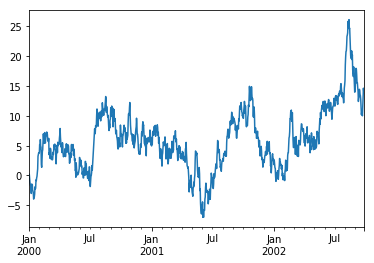

In [107]:
ts.plot()

No DataFrame, a função plot() nos permite plotar todas as colunas com rótulos:

In [108]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [109]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

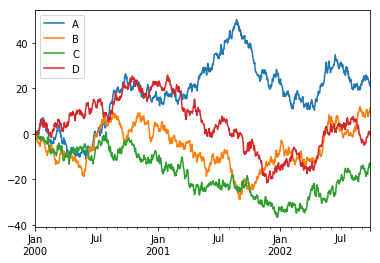

In [110]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Escrevendo em um aquivo CSV](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [111]:
df.to_csv('foo.csv')

[Lendo de um arquivo csv](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [112]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.904731,0.604784,1.413852,0.581320
1,2000-01-02,-2.403658,0.392916,0.451030,-0.147600
2,2000-01-03,-1.564959,0.137733,0.570300,0.384335
3,2000-01-04,-2.060875,-0.247880,0.562194,0.175499
4,2000-01-05,-2.715847,-0.730476,0.775021,0.026282
5,2000-01-06,-1.749362,-2.603220,1.047632,-0.412081
6,2000-01-07,-1.434794,-1.639022,0.020183,0.537855
7,2000-01-08,-1.819792,-3.996747,1.236805,0.453378
8,2000-01-09,-2.129517,-4.019098,-0.106752,0.662992
9,2000-01-10,-0.155257,-3.503339,0.060136,1.447834


### HDF5
Lendo e escrevendo em [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Escrevendo em um HDF5

In [113]:
df.to_hdf('foo.h5','df')

Lendo de um HDF5 

In [114]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.904731,0.604784,1.413852,0.581320
2000-01-02,-2.403658,0.392916,0.451030,-0.147600
2000-01-03,-1.564959,0.137733,0.570300,0.384335
2000-01-04,-2.060875,-0.247880,0.562194,0.175499
2000-01-05,-2.715847,-0.730476,0.775021,0.026282
2000-01-06,-1.749362,-2.603220,1.047632,-0.412081
2000-01-07,-1.434794,-1.639022,0.020183,0.537855
2000-01-08,-1.819792,-3.996747,1.236805,0.453378
2000-01-09,-2.129517,-4.019098,-0.106752,0.662992
2000-01-10,-0.155257,-3.503339,0.060136,1.447834


### Excel

Lendo e escrevendo arquivos do [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Escrevendo em um arquvio excel

In [115]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Lendo de um arquivo excel

In [116]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.904731,0.604784,1.413852,0.581320
1,2000-01-02,-2.403658,0.392916,0.451030,-0.147600
2,2000-01-03,-1.564959,0.137733,0.570300,0.384335
3,2000-01-04,-2.060875,-0.247880,0.562194,0.175499
4,2000-01-05,-2.715847,-0.730476,0.775021,0.026282
5,2000-01-06,-1.749362,-2.603220,1.047632,-0.412081
6,2000-01-07,-1.434794,-1.639022,0.020183,0.537855
7,2000-01-08,-1.819792,-3.996747,1.236805,0.453378
8,2000-01-09,-2.129517,-4.019098,-0.106752,0.662992
9,2000-01-10,-0.155257,-3.503339,0.060136,1.447834
